In [56]:
import pandas as pd
from datetime import datetime
import time

In [57]:
# Pandas DataFrames reading data before and after Covid-19 campus closure on 3/13
df_before = pd.read_csv("before_covid19.csv")
df_after = pd.read_csv("after_covid19.csv")
fill_rates = pd.read_csv("dumpster_fill_rates.csv")

In [58]:
# Average fill levels at time of pick-up
emptied_entries_before = df_before[(df_before.levelAtEmpty >= 0)]
avg_levelAtEmpty_before = emptied_entries_before["levelAtEmpty"].mean()
print("Average Fill Level Before Covid-19:", avg_levelAtEmpty_before)

emptied_entries_after = df_after[(df_after.levelAtEmpty >= 0)]
avg_levelAtEmpty_after = emptied_entries_after["levelAtEmpty"].mean()
print("Average Fill Level After Covid-19:", avg_levelAtEmpty_after)


Average Fill Level Before Covid-19: 38.81395348837209
Average Fill Level After Covid-19: 37.0


In [59]:
# returns integer representing Unix Timestamp, for the purpose of comparing timestamps
def get_unix_time(unformatted_time):
    date_object = datetime.strptime(unformatted_time, "%Y-%m-%dT%H:%M:%S.%fZ")
    new_date = time.mktime(date_object.timetuple())
    return new_date

In [60]:
# Test to see # of pickup events per week

# Gosset, Denton: Recycle MWF - Both only collected once after closure
# VMH - questionable due to missing fill levels/wasEmptied from 3/1-3/9
# Patapsco & UM Tech Ventures - same inconsistent for both trash/recycle (Tech Ventures missing first pickup on 27th)


# Analyzing MWF Recycle pickups for Gosset
pickups = df_before[df_before.serviceLocationId == 1]
pickups = pickups[pickups.wasEmptied == 't']
pickups = pickups[pickups.containerContentType == "recycle"]
pickups

,organization,occurredAt,customerId,customerName,serviceLocationId,serviceLocationDescription,containerId,containerDescription,containerContentType,containerCubicYards,level,wasEmptied,emptyOccurredAt,levelAtEmpty,latitude,longitude,positionAccuracy,imageUrl
41,universityofmaryland,2020-02-26T09:44:19.638Z,NaN,University of Maryland,1.0,Gosset Football Teamhouse,J6MMBE75XVYA,1,recycle,8,0.0,t,2020-02-26T09:44:19.000Z,5.0,38.990211,-76.945747,6.1,https://images.compology.com/1/raw_device_data...
109,universityofmaryland,2020-02-28T09:55:20.821Z,NaN,University of Maryland,1.0,Gosset Football Teamhouse,J6MMBE75XVYA,1,recycle,8,0.0,t,2020-02-28T09:55:20.000Z,20.0,38.990215,-76.945564,16.0,https://images.compology.com/1/raw_device_data...
205,universityofmaryland,2020-03-02T10:02:09.548Z,NaN,University of Maryland,1.0,Gosset Football Teamhouse,J6MMBE75XVYA,1,recycle,8,0.0,t,2020-03-02T10:02:09.000Z,62.0,38.990196,-76.945831,24.0,https://images.compology.com/1/raw_device_data...
268,universityofmaryland,2020-03-04T09:55:46.170Z,NaN,University of Maryland,1.0,Gosset Football Teamhouse,J6MMBE75XVYA,1,recycle,8,0.0,t,2020-03-04T09:55:46.000Z,10.0,38.990184,-76.945831,12.0,https://images.compology.com/1/raw_device_data...
320,universityofmaryland,2020-03-06T09:33:20.069Z,NaN,University of Maryland,1.0,Gosset Football Teamhouse,J6MMBE75XVYA,1,recycle,8,0.0,t,2020-03-06T09:33:20.000Z,40.0,38.990173,-76.945747,8.5,https://images.compology.com/1/raw_device_data...
407,universityofmaryland,2020-03-09T08:36:58.118Z,NaN,University of Maryland,1.0,Gosset Football Teamhouse,J6MMBE75XVYA,1,recycle,8,0.0,t,2020-03-09T08:36:58.000Z,22.0,38.990291,-76.945686,28.0,https://images.compology.com/1/raw_device_data...
474,universityofmaryland,2020-03-11T08:51:53.844Z,NaN,University of Maryland,1.0,Gosset Football Teamhouse,J6MMBE75XVYA,1,recycle,8,5.0,t,2020-03-11T08:51:53.000Z,30.0,38.990367,-76.945762,27.0,https://images.compology.com/1/raw_device_data...


In [61]:
# Notice 'NaN' in fill levels for VMH from 3/1-3/9 
vmh_pickups = df_before[df_before.serviceLocationId == 2]
vmh_pickups = vmh_pickups[vmh_pickups.containerContentType == "refuse"]
vmh_pickups

,organization,occurredAt,customerId,customerName,serviceLocationId,serviceLocationDescription,containerId,containerDescription,containerContentType,containerCubicYards,level,wasEmptied,emptyOccurredAt,levelAtEmpty,latitude,longitude,positionAccuracy,imageUrl
0,universityofmaryland,2020-02-25T17:05:50.790Z,NaN,University of Maryland,2.0,Van Munching Hall,K0V7D3VHWHMN,6,refuse,6,2.0,NaN,NaN,NaN,38.983604,-76.947868,7.4,https://images.compology.com/1/raw_device_data...
15,universityofmaryland,2020-02-25T17:40:29.957Z,NaN,University of Maryland,2.0,Van Munching Hall,K0V7D3VHWHMN,6,refuse,6,2.0,f,NaN,NaN,38.983680,-76.947898,8.1,https://images.compology.com/1/raw_device_data...
18,universityofmaryland,2020-02-26T00:55:57.837Z,NaN,University of Maryland,2.0,Van Munching Hall,K0V7D3VHWHMN,6,refuse,6,12.0,f,NaN,NaN,38.983779,-76.947708,23.0,https://images.compology.com/1/raw_device_data...
31,universityofmaryland,2020-02-26T06:00:22.389Z,NaN,University of Maryland,2.0,Van Munching Hall,K0V7D3VHWHMN,6,refuse,6,10.0,f,NaN,NaN,38.983707,-76.947700,23.0,https://images.compology.com/1/raw_device_data...
43,universityofmaryland,2020-02-26T11:59:46.434Z,NaN,University of Maryland,2.0,Van Munching Hall,K0V7D3VHWHMN,6,refuse,6,0.0,t,2020-02-26T11:59:46.000Z,10.0,38.983627,-76.948120,23.0,https://images.compology.com/1/raw_device_data...
54,universityofmaryland,2020-02-26T17:37:33.515Z,NaN,University of Maryland,2.0,Van Munching Hall,K0V7D3VHWHMN,6,refuse,6,NaN,f,NaN,NaN,38.983715,-76.947845,18.0,https://images.compology.com/1/raw_device_data...
60,universityofmaryland,2020-02-27T01:06:39.767Z,NaN,University of Maryland,2.0,Van Munching Hall,K0V7D3VHWHMN,6,refuse,6,15.0,f,NaN,NaN,38.983398,-76.947853,18.0,https://images.compology.com/1/raw_device_data...
70,universityofmaryland,2020-02-27T06:06:35.308Z,NaN,University of Maryland,2.0,Van Munching Hall,K0V7D3VHWHMN,6,refuse,6,NaN,f,NaN,NaN,38.983818,-76.947753,30.0,https://images.compology.com/1/raw_device_data...
80,universityofmaryland,2020-02-27T12:50:25.661Z,NaN,University of Maryland,2.0,Van Munching Hall,K0V7D3VHWHMN,6,refuse,6,0.0,t,2020-02-27T12:50:25.000Z,15.0,38.983573,-76.947792,30.0,https://images.compology.com/1/raw_device_data...
84,universityofmaryland,2020-02-27T17:37:39.474Z,NaN,University of Maryland,2.0,Van Munching Hall,K0V7D3VHWHMN,6,refuse,6,0.0,f,NaN,NaN,38.983959,-76.947883,30.0,https://images.compology.com/1/raw_device_data...


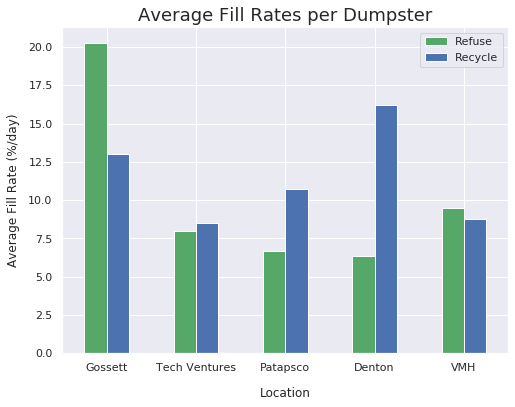

In [64]:
# Graph of average fill rates (from dumpster_fill_rates.csv)
trash_rates = [9.51, 6.35, 6.71, 7.96, 20.29]
trash_rates = [20.29, 7.96, 6.71, 6.35, 9.51]
recycle_rates = [8.78, 16.19, 10.75, 8.5, 13.04]
recycle_rates = [13.04, 8.5, 10.75, 16.19, 8.78]
locations = ['VMH', 'Denton', 'Patapsco', 'Tech Ventures', 'Gossett']
locations = ["Gossett", "Tech Ventures", "Patapsco", "Denton", "VMH"]

fill_rate_df = pd.DataFrame({'Refuse': trash_rates, 'Recycle': recycle_rates}, index=locations)

bar_graph = fill_rate_df.plot.bar(rot=0, figsize=(8,6), color=['g', 'b'])
bar_graph.set_xlabel("Location", labelpad=14)
bar_graph.set_ylabel("Average Fill Rate (%/day)", labelpad=8)
bar_graph.set_title("Average Fill Rates per Dumpster", size=18);